In [ ]:
# Data extraction using scrapy and selenium

import scrapy
import selenium
from scrapy.selector import Selector
from selenium import webdriver
import pandas as pd
import urllib.request
import csv

#ds=pd.DataFrame(columns=['Sleeve Styling','Multipack Set','Occasion','Main Trend','Print or Pattern Type','Neck','Pattern', 'Sleeve Length'])
ds=pd.DataFrame(columns=['Gender', 'Wear Type','Item','Sleeve Styling','Fit','Type','Length','Occasion','Print or Pattern Type','Neck','Pattern', 'Sleeve Length','desc', 'img'])
ds.to_csv("myntra_data.csv", sep='\t', encoding='utf-8')
with open ("scraping.csv", "rU") as f:
    
    reader=csv.DictReader(f)
    for row in reader:
        
        url=row['url']
        sex=row['sex']
        wType=row['type']
        item=row['item']
        page=row['page']
       
    
        furl=url+"/"+sex+"-"+wType+"?f=Categories%3A"+item+page
        link_urls = [furl.format(i) for i in range(7,58)]
    #https://www.myntra.com/men-topwear?f=Categories%3ATshirts&p=2
        for link_url in link_urls:
            print(link_url)
            geckodriver = r'C:\Users\Manas\Desktop\ML\nlp\geckodriver-v0.26.0-win64\geckodriver.exe'
 
            options = webdriver.FirefoxOptions()
            options.add_argument('-headless')
            #driver = webdriver.Remote(desired_capabilities=webdriver.DesiredCapabilities.HTMLUNIT)
 
            driver = webdriver.Firefox(executable_path=geckodriver, firefox_options=options)
            #driver=webdriver.PhantomJS(executable_path=r'C:\Users\Manas\Desktop\ML\phantom\phantomjs-2.1.1-windows\bin\phantomjs.exe')
            driver.get(link_url) 

            scrapy_selector = Selector(text = driver.page_source)
            co=scrapy_selector.xpath('//*[starts-with(@class,"results-base")]')
            content=co.xpath('.//li/@class').extract()
            con=[] 
            for r in content:
                
                if r=='product-base':
                    
                    con.append(r)
            #print(con)

            #search_city = scrapy_selector.xpath('//*[@class="results-base"]').extract_first()

            a=0
            im=[]
            li=[]
            for i in con:
            
                productDesc=None
                sleeve_Styling=None
                length=None
                occasion=None
                fit=None
                print_Pattern=None
                pattern=None
                neck=None
                Type=None
                sleeve_length=None
                imgcol=None
                #geckodriver = r'C:\Users\Manas\Desktop\ML\nlp\geckodriver-v0.26.0-win64\geckodriver.exe'
 
                #options1 = webdriver.FirefoxOptions()
                #options.add_argument('-headless')
 
                #driver1 = webdriver.Remote(desired_capabilities=webdriver.DesiredCapabilities.HTMLUNIT)
    
                driver1 = webdriver.Firefox(executable_path=geckodriver, firefox_options=options)
                #driver1=webdriver.PhantomJS(executable_path=r'C:\Users\Manas\Desktop\ML\phantom\phantomjs-2.1.1-windows\bin\phantomjs.exe')
                rating = co.xpath('.//li')[a]
                #print(rating)
                
                rating_categories = rating.xpath('.//a/@href').extract_first()

                print(rating_categories)
                if rating_categories==None:
                    rating = co.xpath('.//li')[a]
                rating_categories = rating.xpath('.//a/@href').extract_first()
                
                url1="https://www.myntra.com/"+rating_categories
                driver1.get(url1) 
                scrapy_selector1 = Selector(text = driver1.page_source)
                #print(scrapy_selector1)
   
                desc=(scrapy_selector1.xpath('//*/div[@class="pdp-productDescriptorsContainer"]/*/p[normalize-space()]/text()').extract_first())
                #p=scrapy_selector1.xpath('//*/div[@class="pdp-productDescriptorsContainer"]/div/p[normalize-space()]').extract_first()
                #t=scrapy_selector1.xpath('//*/div[@class="pdp-productDescriptorsContainer"]/*/p[normalize-space()]/text()').extract_first()
                #print(p)
                #print(t)
                img=scrapy_selector1.xpath('//*/div[(@class="image-grid-container common-clearfix")]/div/@class').extract()
                img1=scrapy_selector1.xpath('//*/div[starts-with(@class,"image-grid-container common-clearfix")]')
                #print(img)
                l=0
                imgl=[]
    
                b=img1.xpath('//*/div[(@class="index-tableContainer")]/div/@class').extract()
                b1=img1.xpath('//*/div[starts-with(@class,"index-tableContainer")]')
                #print(b)
                #v=0
                q=0
                for k in b:
                                      
                    descriptio=b1.xpath('.//div[@class="index-row"]')[q]
                    #print(descriptio)
                    description=descriptio.xpath('.//div[@class="index-rowValue"]').extract()
                    #print(q)
      
                    #print(description)
           
                    for m in description:
                                  
                        des=descriptio.xpath('.//div[@class="index-rowValue"]') 
                        key=descriptio.xpath('.//div[@class="index-rowKey"]/text()').extract_first()
                        #print(key)
                        if key=='Sleeve Styling':
                             sleeve_Styling=des.xpath('.//text()').extract_first()
           
                        if key=="Occasion":
                             occasion=des.xpath('.//text()').extract_first()
                        if key=="Type":
                             Type=des.xpath('.//text()').extract_first()
                        if key=="Print or Pattern Type":
                             print_Pattern=des.xpath('.//text()').extract_first()
                        if key=="Collar":
                             neck=des.xpath('.//text()').extract_first()
                        if key=="Neck":
                             neck=des.xpath('.//text()').extract_first()
                        if key=="Pattern":
                             pattern=des.xpath('.//text()').extract_first()
                        if key=="Fit":
                             fit=des.xpath('.//text()').extract_first()
                        if key=="Sleeve Length":
                             sleeve_length=des.xpath('.//text()').extract_first()
                        if key=="Length":
                             length=des.xpath('.//text()').extract_first
                        #r=des.xpath('.//text()').extract_first()
                        #print(r)  
                    q=q+1
    #ds=ds.append({'Sleeve Styling':sleeve_Styling,'Multipack Set'multipack_Set,'Occasion':occasion,'Main Trend': main_Trend,'Print or Pattern Type': print_Pattern,'Neck':neck,'Pattern': pattern, 'Sleeve Length':sleeve_length,'desc':desc, 'img'=imgcol},ignore_index=True)
                for j in img:
            
                               
                    img_u=img1.xpath('.//div')[l]
                    img_url=img_u.xpath('.//div/@style').extract_first()
                    #print(img_u)
                    #print(l)
                    if img_url != None:
                        
                        mySubString=img_url[img_url.find('("')+2:img_url.find('")')]
                        #print(mySubString)
            
                        name=mySubString.rsplit('/', 1)[-1]
                        ds=ds.append(pd.Series([sex,wType,item,sleeve_Styling,fit,Type,occasion,length,print_Pattern,neck,pattern, sleeve_length,desc, name], index=['Gender', 'Wear Type','Item','Sleeve Styling','Fit','Type','Occasion','Length','Print or Pattern Type','Neck','Pattern', 'Sleeve Length','desc', 'img']), ignore_index=True)
                        ds.to_csv("myntra_data.csv", sep='\t', encoding='utf-8', mode='a', header=False)
    
                        urllib.request.urlretrieve(mySubString, name)

                    l=l+1
    
    
                driver1.close()
                print(a)
                a=a+1



In [1]:
# Read raw data and modify to required format
import colour
from colour import Color
import pandas as pd
import csv
#df=(columns=['Gender', 'Wear Type','Item','Sleeve Styling','Fit','Type','Length','Occasion','Print or Pattern Type','Neck','Pattern', 'Sleeve Length','desc', 'img', 'color', 'Multicolor'])

ds=pd.read_csv(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\myntra_data.csv',error_bad_lines=False,sep='\t')
ds.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Gender,Wear Type,Item,Sleeve Styling,Fit,Type,Length,Occasion,Print or Pattern Type,Neck,Pattern,Sleeve Length,desc,img
0,0,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",0dcec4bb-3be9-4c67-9d9a-ecdcc937f98d1528807434...
1,0,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",0dcec4bb-3be9-4c67-9d9a-ecdcc937f98d1528807434...
2,1,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",0dcec4bb-3be9-4c67-9d9a-ecdcc937f98d1528807434...
3,0,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",0dcec4bb-3be9-4c67-9d9a-ecdcc937f98d1528807434...
4,1,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",0dcec4bb-3be9-4c67-9d9a-ecdcc937f98d1528807434...


In [55]:
ds.columns=['Gender', 'Wear Type','Item','Sleeve Styling','Fit','Type','Length','Occasion','Print or Pattern Type','Neck','Pattern', 'Sleeve Length','desc', 'img', 'color', 'Multicolor']


In [6]:
#Add coulumn color and Multicolor
ds['color']=''
ds['multicolored']=''
import numpy as np
for row in np.arange(0,len(ds.index)-1):
    d= ds['desc'][row]
    d=d.replace(',', '')
    s=','.join([i for i in d.split(' ') if check_color(i)])
    ds['color'][row]=s
    if s.count(",") > 0:
        
        ds['multicolored'][row]='Y'
    else:
        ds['multicolored'][row]='N'
        


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
#Define fuction to identify color names form Description text
def check_color(color):
    try:
        Color(color)
        return True
    except ValueError:
        return False

In [3]:
#Drop duplicate records
ds= ds.drop_duplicates(subset='img', keep='first', inplace=False)

In [4]:
#resset the index
ds = ds.reset_index(drop=True)

In [2]:
#Drop the uncecessary columns
del ds['Unnamed: 0']

In [7]:
ds.head()

,Gender,Wear Type,Item,Sleeve Styling,Fit,Type,Length,Occasion,Print or Pattern Type,Neck,Pattern,Sleeve Length,desc,img,color,multicolored
0,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",0dcec4bb-3be9-4c67-9d9a-ecdcc937f98d1528807434...,Blue,N
1,men,bottomwear,Jeans,NaN,Skinny Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,Ripped,Regular,"Blue medium wash 5-pocket mid-rise jeans, mild...",6c15cab1-0220-4c5c-a78d-dc56319cc67a1528807434...,Blue,N
2,men,bottomwear,Jeans,NaN,Tapered Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Heavy Fade,NaN,NaN,Regular,"Grey medium wash 5-pocket mid-rise jeans, clea...",ec096bc0-d2d9-4cf1-9fe8-7f395675e1671554196295...,Grey,N
3,men,bottomwear,Jeans,NaN,Tapered Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Heavy Fade,NaN,NaN,Regular,"Grey medium wash 5-pocket mid-rise jeans, clea...",413eaecf-3862-41f7-9c20-4a1a7affbb4a1554196295...,Grey,N
4,men,bottomwear,Jeans,NaN,Slim Fit,NaN,<bound method SelectorList.get of [<Selector x...,NaN,Light Fade,NaN,NaN,Regular,"Blue medium wash 5-pocket mid-rise jeans, clea...",899acb62-76a5-4e91-b973-b7d8ad771d671550820021...,Blue,N


In [6]:
len(ds.index)

7352

In [54]:
ds.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,male,topwear,Tshirts,Regular Sleeves,NaN,NaN,NaN,Casual,Colourblocked,NaN,Colourblocked,Short Sleeves,"Navy Blue and green colourblocked T-shirt, has...",4d826b89-0119-4c89-8861-4a8cea8ed0691548844555...,"Navy,Blue,green",Y
1,male,topwear,Tshirts,Regular Sleeves,NaN,NaN,NaN,Casual,Colourblocked,NaN,Colourblocked,Short Sleeves,"Navy Blue and green colourblocked T-shirt, has...",a9ad7508-ade4-43fb-9308-93423508d4f51548844555...,"Navy,Blue,green",Y
2,male,topwear,Tshirts,Regular Sleeves,NaN,NaN,NaN,Casual,Striped,NaN,Solid,Long Sleeves,"Sea Green solid T-shirt, has a round neck, and...",29bdd2c8-3e2f-43aa-8ce5-55f3a501a4fa1577166621...,Green,N
3,male,topwear,Tshirts,Regular Sleeves,NaN,NaN,NaN,Casual,Striped,NaN,Solid,Long Sleeves,"Sea Green solid T-shirt, has a round neck, and...",03e7b7f3-d728-46e4-8b84-c66292c651211577166621...,Green,N
4,male,topwear,Tshirts,Regular Sleeves,NaN,NaN,NaN,Casual,Typography,NaN,Printed,Short Sleeves,"White embroidered T-shirt, has a round neck, a...",47798e56-0715-4b13-b007-86f745aef1641579158869...,White,N


In [8]:
#Export the cleaned data frame to csv for future use
ds.to_csv("Bottom.csv", sep='\t', encoding='utf-8', mode='a', header=True)

In [32]:
#Merge  multiple data set to one
import os, glob
import pandas as pd

path = r"C:\Users\Manas\Desktop\ML\Capstoneproject\Merged"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep='\t', header=0)
    df['file'] = f.split('\t')[-1]
    all_df.append(df)
    
merged1_df = pd.concat(all_df, ignore_index=True, sort=True)

In [37]:
len(merged_df.index)

18448

In [2]:
# Convert the images to 32X32 format to educe training time
import PIL
from PIL import Image
import PIL 
import os
from PIL import Image 
for image_name in os.listdir(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\img'):
    
    image_path = os.path.join(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\img', image_name) 
    img = Image.open(image_path) 
    img = img.resize((32, 32), PIL.Image.ANTIALIAS) 
    img.save(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\img32\{}'.format(image_name))

In [ ]:
import PIL 
import os
from PIL import Image 
for image_name in os.listdir(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\img'):
    
    image_path = os.path.join(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\img', image_name) 
    img = Image.open(image_path) 
    img = img.resize((32, 32), PIL.Image.ANTIALIAS) 
    img.save(r'C:\Users\Manas\Desktop\ML\Capstoneproject\bottomwear\img32\{}'.format(image_name))

In [1]:
#Read CSV
import pandas as pd

df=pd.read_csv('Merged.csv', error_bad_lines=False,sep='\t')
test=pd.read_csv('Test.csv', error_bad_lines=False,sep='\t')

In [3]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [6]:
#No of null values
df.isnull().sum(axis=0)

Unnamed: 0                   0
Gender                       0
Wear Type                    0
Item                         0
Sleeve Styling           14175
Fit                      11658
Type                     13228
Length                    6901
Occasion                  3775
Print or Pattern Type     4048
Neck                     10866
Pattern                   5626
Sleeve Length             1128
desc                         0
img                          0
color                     2177
Multicolor                   4
dtype: int64

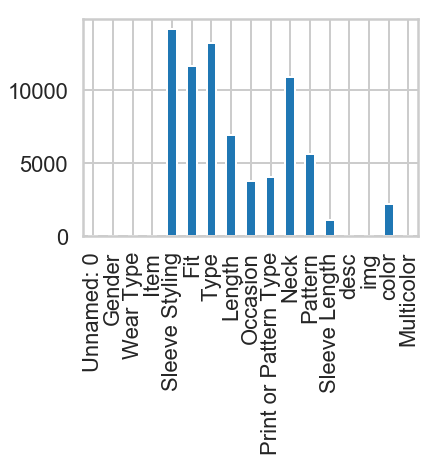

In [7]:
# Columns with null vvalue plotted in bar graph
df.isnull().sum(axis=0).plot('bar')

In [ ]:
import numpy as np
d=df.filter(['Pattern','img'],axis=1)
d.dropna(subset=['Pattern'], inplace=True)
#df.head()
#test = test.rename(columns={'multicolored': 'Multicolor'})
un=np.unique(d[['Pattern']].values)
un 

In [ ]:
#Filtering only required columns
ds= df.filter(['Item', 'Sleeve Length', 'Multicolor', 'color', 'img'], axis=1)
dt= test.filter(['Item', 'Sleeve Length', 'multicolored', 'color', 'img'], axis=1)